### Import packages for model development

In [2]:
# import libraries for data balancing
import imblearn.combine as c_sampling
import imblearn.over_sampling as o_sampling
import imblearn.pipeline as pl
import imblearn.under_sampling as u_sampling

# import libraries for data manipulation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#import libraries for model training
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, make_scorer, f1_score, roc_auc_score, precision_score, precision_recall_curve, roc_curve

### Import credit card dataset

In [4]:
df = pd.read_csv('../../datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = df.drop(columns='Class')
y = df['Class']

In [6]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [5]:
def add_data_labels_bar(x,y, pos):
    y_total = y.sum()
    for i in range(len(x)):
        plt.text(i, y[i] + pos, f'{y[i]:,} ({round((y[i] * 100)/ y_total, 1)}%)', ha = 'center')

In [7]:
def plot_y_dist(y, technique, pos=2000):
    g = y.value_counts()
    plt.figure(figsize=[12, 8])
    plt.bar(g.index, g.values)
    add_data_labels_bar(g.index, g.values, pos)
    plt.xticks([0, 1], labels=['Non-fraudulent', 'Fraudulent'])
    plt.xlabel('Credit Card Transactions')
    plt.title(f'Frequency Distribution of Transactions ({technique})');

In [8]:
scoring = {
    'f1_score': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)
#     'precision_score': make_scorer(precision_score),
}

In [9]:
def evaluate_sampler(method):
    # define pipeline
    steps = [method, ('model', DecisionTreeClassifier(random_state= 1))]
    pipeline = pl.Pipeline(steps= steps)
    # define evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate model
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    # summarize performance
    print('F1 score: %.3f' % np.mean(scores['test_f1_score']))
    print('ROC AUC: %.3f' % np.mean(scores['test_roc_auc_score']))
#     print('Precision Score: %.3f' % np.mean(scores['test_precision_score']))

### Train baseline model

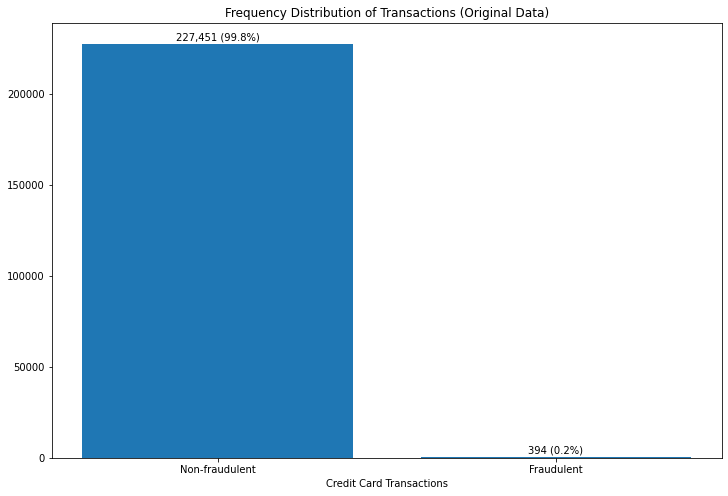

In [10]:
plot_y_dist(y_train, 'Original Data')

In [10]:
# define model
model = DecisionTreeClassifier(random_state= 1)
# define evaluation procedure
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# evaluate model
scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
# summarize performance
print('F1 score: %.3f' % np.mean(scores['test_f1_score']))
print('ROC AUC: %.3f' % np.mean(scores['test_roc_auc_score']))
# print('Precision Score: %.3f' % np.mean(scores['test_precision_score']))

### Balancing Techniques


#### Oversampling


##### SMOTE

In [13]:
over_s1 = o_sampling.SMOTE()
X_train_sam1, y_train_sam1 = over_s1.fit_resample(X_train, y_train)

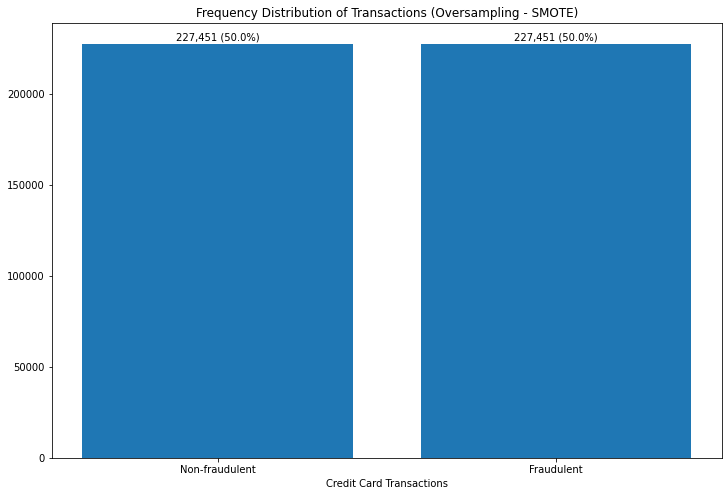

In [14]:
plot_y_dist(y_train_sam1, 'Oversampling - SMOTE')

In [16]:
evaluate_sampler(('os1', over_s1))

F1 score: 0.552
ROC AUC: 0.887
Precision Score: 0.429


##### Random Oversampling

In [17]:
over_s2 = o_sampling.RandomOverSampler(sampling_strategy= 'minority')
X_train_sam2, y_train_sam2 = over_s2.fit_resample(X_train, y_train)

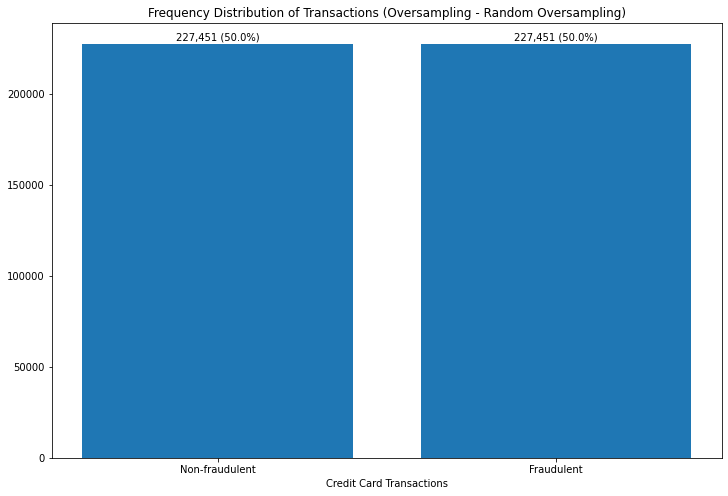

In [18]:
plot_y_dist(y_train_sam2, 'Oversampling - Random Oversampling')

In [ ]:
evaluate_sampler(('os2', over_s2))

#### Borderline SMOTE

In [ ]:
over_s3 = o_sampling.BorderlineSMOTE()
X_train_sam3, y_train_sam3 = over_s3.fit_resample(X_train, y_train)

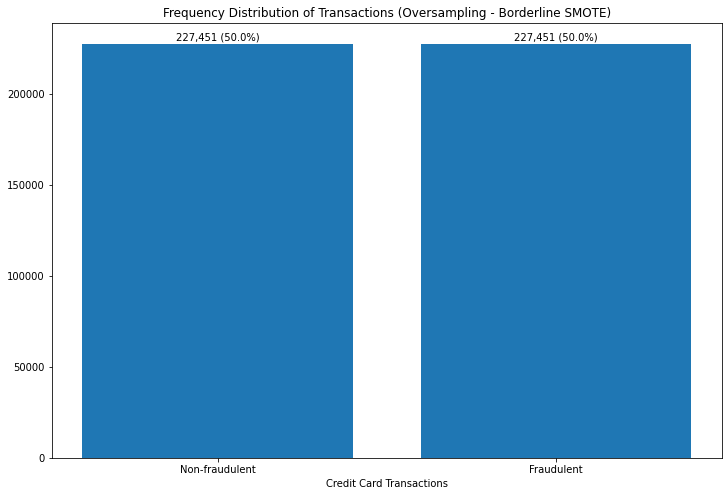

In [ ]:
plot_y_dist(y_train_sam1, 'Oversampling - Borderline SMOTE')

In [ ]:
evaluate_sampler(('os3', over_s3))

F-beta score: 0.697 (+/- 0.09)


#### SVM SMOTE

In [ ]:
over_s4 = o_sampling.SVMSMOTE()
X_train_sam4, y_train_sam4 = over_s4.fit_resample(X_train, y_train)

In [ ]:
plot_y_dist(y_train_sam4, 'Oversampling - SVMSMOTE')

In [ ]:
evaluate_sampler(('os4', over_s4))

#### ADASYN

In [ ]:
over_s5 = o_sampling.ADASYN()
X_train_sam5, y_train_sam5 = over_s5.fit_resample(X_train, y_train)

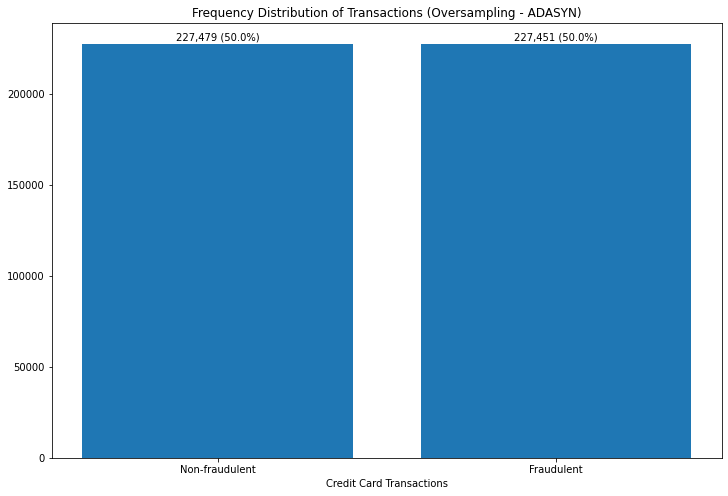

In [ ]:
plot_y_dist(y_train_sam5, 'Oversampling - ADASYN')

In [ ]:
evaluate_sampler(('os5', over_s5))

#### Combined Sampling

##### SMOTE & Tomek Links

In [ ]:
combined_s1 = c_sampling.SMOTETomek(tomek=u_sampling.TomekLinks(sampling_strategy='majority'))
X_train_sam13, y_train_sam13 = combined_s1.fit_resample(X_train, y_train)

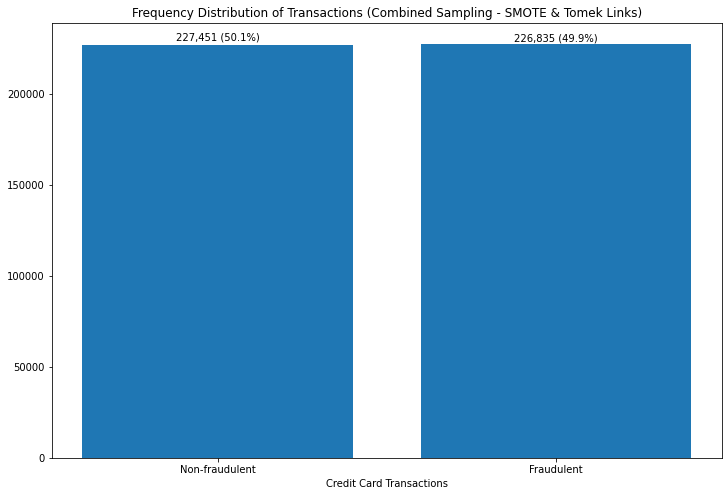

In [ ]:
plot_y_dist(y_train_sam13, 'Combined Sampling - SMOTE & Tomek Links')

In [ ]:
evaluate_sampler(('cs1', combined_s1))

##### SMOTE & ENN

In [ ]:
combined_s2 = c_sampling.SMOTEENN(enn=u_sampling.EditedNearestNeighbours(sampling_strategy='majority'))
X_train_sam14, y_train_sam14 = combined_s2.fit_resample(X_train, y_train)

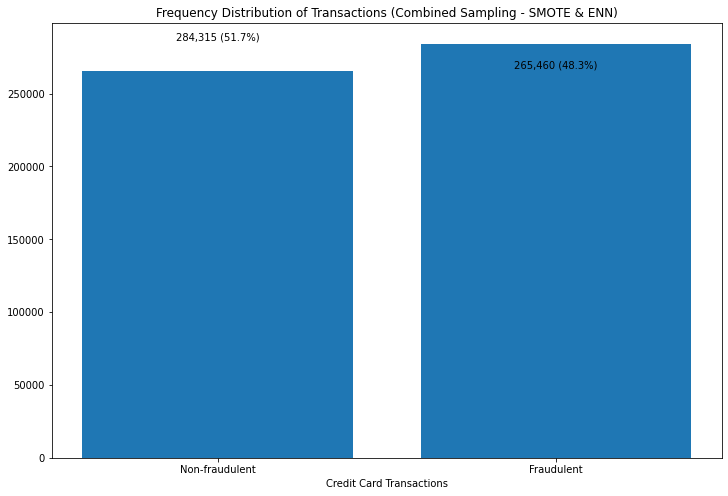

In [ ]:
plot_y_dist(y_train_sam14, 'Combined Sampling - SMOTE & ENN')

In [ ]:
evaluate_sampler(('cs2', combined_s2))

Mean F1 score: 0.774


### Model Development

In [ ]:
# define model
model = DecisionTreeClassifier(random_state=1)
# fit on unbalanced training data
model.fit(X_train, y_train)

In [ ]:
# define pipeline
steps = [('sampler', o_sampling.SMOTE()), ('model', DecisionTreeClassifier(random_state= 1))]
pipeline = pl.Pipeline(steps= steps)
pipeline.fit(X_train, y_train)

### Model Evaluation

In [ ]:
# predict probabilities using unbalanced model
yhat_ub = model.predict_proba(X_holdout)
# retrieve just the probabilities for the positive class
pos_probs_ub = yhat_ub[:, 1]

In [ ]:
# predict probabilities using balanced model
yhat_b = pipeline.predict_proba(X_holdout)
# retrieve just the probabilities for the positive class
pos_probs_b = yhat_b[:, 1]

#### Receiving Operating Charasteristic (ROC) Curve

In [ ]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for unbalanced model
fpr_ub, tpr_ub, _ = roc_curve(y_holdout, pos_probs_ub)
# plot unbalanced model roc curve
plt.plot(fpr_ub, tpr_ub, marker='.', label='unbalanced dataset')

# calculate roc curve for balanced model
fpr_b, tpr_b, _ = roc_curve(y_holdout, pos_probs_b)
# plot balanced model roc curve
plt.plot(fpr_b, tpr_b, marker='.', label='balanced dataset')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

# calculate the unbalanced roc auc
roc_auc_ub = roc_auc_score(y_holdout, pos_probs_ub)
print('Unbalanced ROC AUC %.3f' % roc_auc_ub)

# calculate the balanced roc auc
roc_auc_b = roc_auc_score(y_holdout, pos_probs_b)
print('Balanced ROC AUC %.3f' % roc_auc_b)

#### Precision Recall Curve

In [ ]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate unbalanced model precision-recall curve
precision_ub, recall_ub, _ = precision_recall_curve(y_holdout, pos_probs_ub)
# plot the unbalanced model precision-recall curve
plt.plot(recall_ub, precision_ub, marker='.', label='unbalanced dataset')
# calculate balanced model precision-recall curve
precision_b, recall_b, _ = precision_recall_curve(y_holdout, pos_probs_b)
# plot the balanced model precision-recall curve
plt.plot(recall_b, precision_b, marker='.', label='balanced dataset')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

# calculate the unbalanced precision-recall auc
pr_auc_ub = auc(recall_ub, precision_ub)
print('Unbalanced PR AUC: %.3f' % pr_auc_ub)

# calculate the balanced precision-recall auc
pr_auc_b = auc(recall_b, precision_b)
print('Balanced PR AUC: %.3f' % pr_auc_b)